### First some house keeping, let's check for the system's Python paths:
We want to make sure we are running Python 3:

In [1]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


We want our current working directory to point to the servers Quantum Fog directory:

In [2]:
import os
print(os.getcwd())
os.chdir('../../')
qfog_sys_path=os.getcwd()
print(qfog_sys_path)

/home/jupyter/Notebooks/quantum-fog/jupyter-notebooks/Dekant-talk-at-Meetup-Dec-19-2016
/home/jupyter/Notebooks/quantum-fog


We will use `qfog_sys_path` like and environment variable. In order to be able to load local Quantum Fog python modules we need to add it to the current project path:

In [3]:
sys.path.insert(0,qfog_sys_path)
print(sys.path)

['/home/jupyter/Notebooks/quantum-fog', '', '/opt/anaconda3/lib/python36.zip', '/opt/anaconda3/lib/python3.6', '/opt/anaconda3/lib/python3.6/lib-dynload', '/opt/anaconda3/lib/python3.6/site-packages', '/opt/anaconda3/lib/python3.6/site-packages/Sphinx-1.5.1-py3.6.egg', '/opt/anaconda3/lib/python3.6/site-packages/setuptools-27.2.0-py3.6.egg', '/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/home/jupyter/.ipython']


We need to import display module components that will allow us to produce richly formated output, and specify that we want our math plots as inline SVG.

In [4]:
from IPython.display import (
    display_pretty, display_html, display_jpeg, Image, SVG,
    display_png, display_json, display_latex, display_svg, HTML, display
)
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Graphviz is an OS independent standard to define and render graphs, this module makes it accessible in Python.

In [5]:
from graphviz import Digraph, Source

# Why Jupyter?

This little demo is just to give an impression why Jupyter is awesome and catching on like fire. The module and wrapper is [maintained on github](https://github.com/oscar6echo/ezvis3d), and can be installed via "`pip install ezvis3d`"

In [6]:
import warnings
warnings.filterwarnings("ignore", module="matplotlib")

from __future__ import division

import os, sys
import numpy as np
import pandas as pd
import datetime as dt
import random as rd

from IPython.display import display
from math import sin, cos, pi, sqrt

import ezvis3d as v3d

def z(x, y):
    return 50+ sin(x/50) * cos(y/50) * 50

x_min = 0
x_max = 314
x_num = 50

x_rng = np.linspace(x_min, x_max, x_num)
y_rng = x_rng
li_data = [{'x': x, 'y': y, 'z': z(x, y)}
            for y in y_rng
            for x in x_rng]
df_data = pd.DataFrame(li_data)

g = v3d.Vis3d()
g.width = '600px'
g.height = '600px'
g.style = 'surface'
g.showPerspective = True
g.showGrid = True
g.showShadow = False
g.keepAspectRatio = True
g.verticalRatio = 0.7
g.cameraPosition = {'horizontal' : 0.9,
                    'vertical': 0.4,
                    'distance': 1.5
                   }

g.plot(df_data, save=True)

Open console to check js libs were loaded in page


# On to Bayesian Networks!

Now let's get into Bayesian Networks!<br><br>
One of the simplest networks can be used to illustrate a puzzle that is almost as ubiquous in pop culture as Schrödinger's cat.

The Monty Hall problem illustrates perfectly how difficult it is for humans to properly reason under uncertainty.

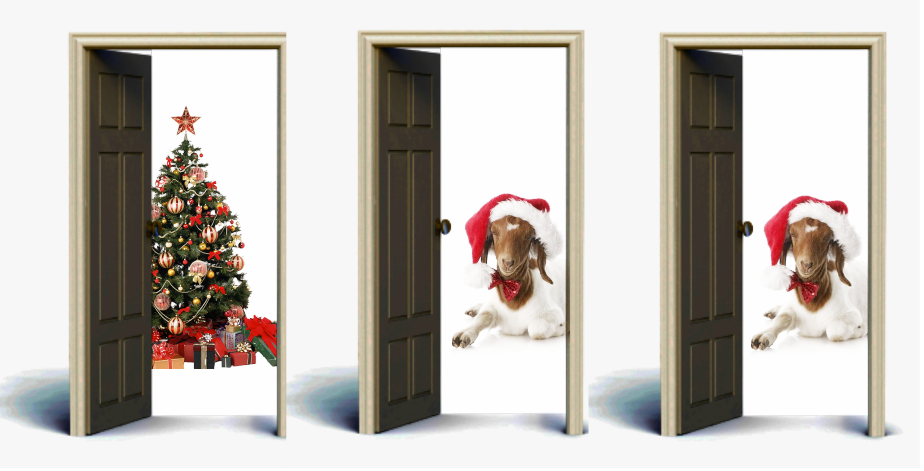

In [7]:
MH=Image(qfog_sys_path+"/jupyter-notebooks/Dekant-talk-at-Meetup-Dec-19-2016/X-Mess_Monty_Hall.png")
display(MH)

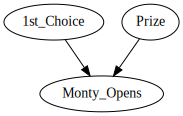

In [8]:
from graphs.BayesNet import *
path_bif = qfog_sys_path+'/examples_cbnets/Monty_Hall.bif'
bnet = BayesNet.read_bif(path_bif, False) # The flag value False indicates that this is a classical B-net
path_dot = qfog_sys_path+'/examples_cbnets/Monty_Hall.dot'
bnet.write_dot(path_dot)
file = open(path_dot, 'r')#READING DOT FILE
MHdot=file.read()
Source(MHdot)

In [9]:
import types
for node in bnet.nodes:
    print("name: ", node.name)
    print("parents: ", [x.name for x in node.parents])
    print("children: ", [x.name for x in node.children])
    print("pot_arr: \n", node.potential.pot_arr)
   
    if isinstance(node.potential.pot_arr[0], float):
        print("pot_arr: \n", ["{:.1%}".format(p) for p in node.potential.pot_arr])
    else:
        print("pot_arr: \n")
        [print([["{:.0%}".format(p) for p in b] for b in a]) for a in node.potential.pot_arr]
    print("\n")

name:  1st_Choice
parents:  []
children:  ['Monty_Opens']
pot_arr: 
 [ 0.33333333  0.33333333  0.33333333]
pot_arr: 
 ['33.3%', '33.3%', '33.3%']


name:  Prize
parents:  []
children:  ['Monty_Opens']
pot_arr: 
 [ 0.33333333  0.33333333  0.33333333]
pot_arr: 
 ['33.3%', '33.3%', '33.3%']


name:  Monty_Opens
parents:  ['1st_Choice', 'Prize']
children:  []
pot_arr: 
 [[[ 0.   0.5  0.5]
  [ 0.   0.   1. ]
  [ 0.   1.   0. ]]

 [[ 0.   0.   1. ]
  [ 0.5  0.   0.5]
  [ 1.   0.   0. ]]

 [[ 0.   1.   0. ]
  [ 1.   0.   0. ]
  [ 0.5  0.5  0. ]]]
pot_arr: 

[['0%', '50%', '50%'], ['0%', '0%', '100%'], ['0%', '100%', '0%']]
[['0%', '0%', '100%'], ['50%', '0%', '50%'], ['100%', '0%', '0%']]
[['0%', '100%', '0%'], ['100%', '0%', '0%'], ['50%', '50%', '0%']]




To perform some inference on this B-Net we will need the list of the network's nodes:

In [10]:
id_nums = sorted([node.id_num for node in bnet.nodes])
node_list = [bnet.get_node_with_id_num(k) for k in id_nums]
print(node_list)

[<nodes.BayesNode.BayesNode object at 0x7fda30073320>, <nodes.BayesNode.BayesNode object at 0x7fda30075da0>, <nodes.BayesNode.BayesNode object at 0x7fda30073240>]


Now we can instantiate an Inference Engine. For small networks we can always brute force it. For larger ones Quantum Fog provides an MCMC (Markov Chain Monte Carlo) inference engine.

In [11]:
from inference.EnumerationEngine import *
brute_eng = EnumerationEngine(bnet)

Now we can enumerate the probabilities for all random variable combinations i.e. a full joint probability table.

Story #,1st_Choice,Prize,Monty_Opens,Potential
2,0,0,1,1/18
3,0,0,2,1/18
6,0,1,2,1/9
8,0,2,1,1/9
12,1,0,2,1/9
13,1,1,0,1/18
15,1,1,2,1/18
16,1,2,0,1/9
20,2,0,1,1/9
22,2,1,0,1/9


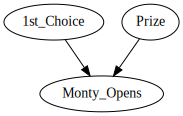

In [12]:
brute_pot_list = brute_eng.get_unipot_list(node_list,
            print_stories=True, print_format='HTML', events='nonull', pot_val_format='Fraction')
Source(MHdot)

We can introduce evidence by hard-wiring the states of nodes. Since this reinitialized the graph we need to enumerate over the nodes again to get the current node list, used for marginalizing the probability distribution.

In [13]:
bnet.get_node_named("1st_Choice").active_states = [1]
bnet.get_node_named("Monty_Opens").active_states = [0]
bnet.get_node_named("Prize").active_states = [0,1,2]
brute_eng = EnumerationEngine(bnet)
id_nums = sorted([node.id_num for node in bnet.nodes])
node_list = [bnet.get_node_with_id_num(k) for k in id_nums]
pot_list = brute_eng.get_unipot_list(node_list, normalize=True, 
            print_stories=True, print_format='HTML', events='nonull', pot_val_format='Fraction')

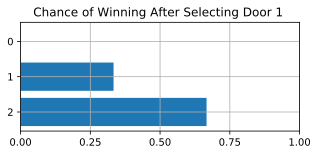

In [14]:
def single_pd(ax, node_name, pd_df):
    y_pos = np.arange(len(pd_df.index)) + .5
    plt.sca(ax)
    plt.yticks(y_pos, pd_df.index)
    ax.invert_yaxis()

    ax.set_xticks([0, .25, .5, .75, 1])
    ax.set_xlim(0, 1)

    ax.grid(True)
    ax.set_title(node_name)
    ax.barh(y_pos, pd_df.values, align='center')
df=[p.pot_arr.tolist() for p in pot_list if p.focus_node.name == 'Prize']
pd_df=pd.DataFrame(np.array(df[0]), index = [0,1,2])
plt.figure(figsize=(5,2))
ax_list = plt.gca()
single_pd(ax_list, 'Chance of Winning After Selecting Door 1 ', pd_df)
plt.show()

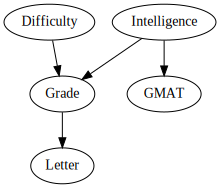

In [15]:
path_bif = qfog_sys_path+'/examples_cbnets/student.bif'
bnet = BayesNet.read_bif(path_bif, False)
path1 = qfog_sys_path+'/examples_cbnets/student.dot'
file = open(path1, 'r')#READING DOT FILE
text=file.read()
Source(text)

In [16]:
id_nums = sorted([node.id_num for node in bnet.nodes])
node_list = [bnet.get_node_with_id_num(k) for k in id_nums]
print(node_list)

[<nodes.BayesNode.BayesNode object at 0x7fda300756a0>, <nodes.BayesNode.BayesNode object at 0x7fda30075ac8>, <nodes.BayesNode.BayesNode object at 0x7fda30075a90>, <nodes.BayesNode.BayesNode object at 0x7fda300757b8>, <nodes.BayesNode.BayesNode object at 0x7fda1bdb7470>]


Story #,Difficulty,Intelligence,GMAT,Grade,Letter,Potential
1,0,0,0,0,0,11.85%
2,0,0,0,0,1,0.12%
3,0,1,0,0,0,0.18%
4,0,1,0,0,1,0.00%
5,1,0,0,0,0,23.70%
6,1,0,0,0,1,0.24%
7,1,1,0,0,0,1.19%
8,1,1,0,0,1,0.01%
9,0,0,0,1,0,6.38%
10,0,0,0,1,1,9.58%


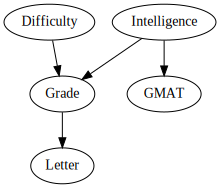

In [17]:
brute_eng = EnumerationEngine(bnet)
id_nums = sorted([node.id_num for node in bnet.nodes])
node_list = [bnet.get_node_with_id_num(k) for k in id_nums]
pot_list = brute_eng.get_unipot_list(node_list, 
        print_stories=True, print_format='HTML', pot_val_format='Percentage') # {:.2%}')
Source(text)

Story #,Difficulty,Intelligence,GMAT,Grade,Letter,Potential
1,0,0,0,0,1,0.28%
2,0,1,0,0,1,0.00%
3,1,0,0,0,1,0.57%
4,1,1,0,0,1,0.03%
5,0,0,0,1,1,22.76%
6,0,1,0,1,1,1.28%
7,1,0,0,1,1,3.03%
8,1,1,0,1,1,1.03%
9,0,0,0,2,1,25.60%
10,0,1,0,2,1,5.39%


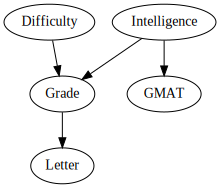

In [18]:
bnet.get_node_named("Letter").active_states = [1]
brute_eng = EnumerationEngine(bnet)
id_nums = sorted([node.id_num for node in bnet.nodes])
node_list = [bnet.get_node_with_id_num(k) for k in id_nums]
pot_list = brute_eng.get_unipot_list(node_list, normalize=True,
        print_stories=True, print_format='HTML', pot_val_format='Percentage')
Source(text)

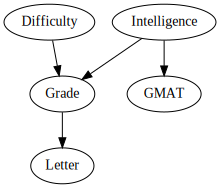

In [19]:
bnet.get_node_named("Grade").active_states = [2]
brute_eng = EnumerationEngine(bnet)
id_nums = sorted([node.id_num for node in bnet.nodes])
node_list = [bnet.get_node_with_id_num(k) for k in id_nums]
pot_list = brute_eng.get_unipot_list(node_list, normalize=True,
        print_stories=True, print_format='HTML', pot_val_format='Percentage')
Source(text)

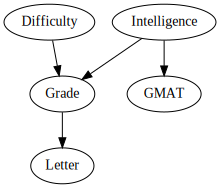

In [20]:
bnet.get_node_named("Intelligence").active_states = [1]
bnet.get_node_named("Grade").active_states = [0]
bnet.get_node_named("Grade").active_states = [0]
brute_eng = EnumerationEngine(bnet)
id_nums = sorted([node.id_num for node in bnet.nodes])
node_list = [bnet.get_node_with_id_num(k) for k in id_nums]
pot_list = brute_eng.get_unipot_list(node_list, normalize=True,
        print_stories=True, print_format='HTML', pot_val_format='Percentage')
Source(text)

The following shows the classic "Asian" Bayesian Network example ([Lauritzen&Spiegelhalter88](https://www.eecis.udel.edu/~shatkay/Course/papers/Lauritzen1988.pdf)) slightly updated to bring it into the 21st century, where you would have to visit TB High Risk Areas (HRA) in Asia in order to get a meaningfull conditional probability.

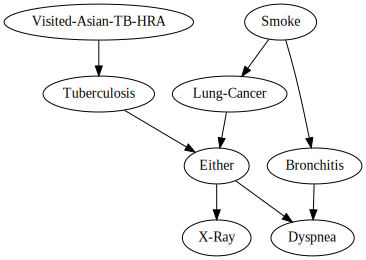

In [21]:
from graphs.BayesNet import *
path_bif = qfog_sys_path+'/examples_cbnets/asia.bif'
bnet = BayesNet.read_bif(path_bif, False) # The flag value False indicates that this is a classical B-net
path_dot = qfog_sys_path+'/examples_cbnets/asia.dot'
bnet.write_dot(path_dot)
file = open(path_dot, 'r')#READING DOT FILE
dot=file.read()
Source(dot)

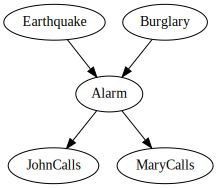

In [22]:
from graphs.BayesNet import *
path_bif = qfog_sys_path+'/examples_cbnets/earthquake.bif'
bnet = BayesNet.read_bif(path_bif, False) # The flag value False indicates that this is a classical B-net
path_dot = qfog_sys_path+'/examples_cbnets/earthquake.dot'
bnet.write_dot(path_dot)
file = open(path_dot, 'r')#READING DOT FILE
dot=file.read()
Source(dot)

# Hamilton Principle And Feynman Path Integrals

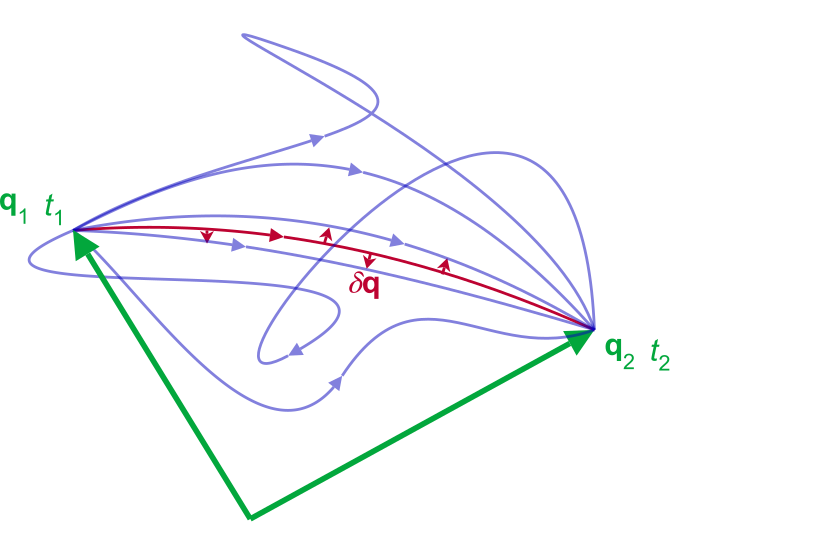

In [23]:
LA=SVG(qfog_sys_path+"/jupyter-notebooks/Dekant-talk-at-Meetup-Dec-19-2016/Least_action_principle.svg")
display(LA)

Action functional over generalized coordinates:
$$ \mathcal{S}[\mathbf{q}] \ \stackrel{\mathrm{def}}{=}\  
\int_{t_1}^{t_2} L(\mathbf{q}(t),\dot{\mathbf{q}}(t),t)\, dt $$
Variational Principle:
$$ \frac{\delta \mathcal{S}}{\delta \mathbf{q}(t)}=0 $$

For a particle in a smooth potential, the path integral is approximated by zigzag paths, which in one dimension is a product of ordinary integrals. For the motion of the particle from position x<sub>a</sub> at time t<sub>a</sub> to x<sub>b</sub> at time t<sub>b</sub>, the time sequence

$$ t_a=t_0<t_1<\ldots<t_{n-1}<t_n<t_{n+1}=t_b $$

can be divided up into n + 1 smaller segments t<sub>j</sub> − t<sub>j − 1</sub>, where j = 1,...,n + 1, of fixed duration

$$ \epsilon = \Delta t=\frac{t_b-t_a}{n+1}\,. $$

This process is called time-slicing.

An approximation for the path integral can be computed as proportional to

$$ \int\limits_{-\infty}^{+\infty}\,\ldots \int\limits_{-\infty}^{+\infty}\,
\ \exp \left(\frac{i}{\hbar}\int_{t_a}^{t_b} L\big(x(t),v(t), t\big)\,dt\right)\,dx_0 \, \ldots \, dx_n $$

where L(x,v,t) is the Lagrangian of the one-dimensional system with position variable x(t) and velocity |v = ẋ(t) considered (see below), and dx<sub>j</sub> corresponds to the position at the j-th time step, if the time integral is approximated by a sum of n terms.<ref>For a simplified, step by step, derivation of the above relation see <a href=http://www.quantumfieldtheory.info/website_Chap18.pdf> Path Integrals in Quantum Theories: A Pedagogic 1st Step</a>.

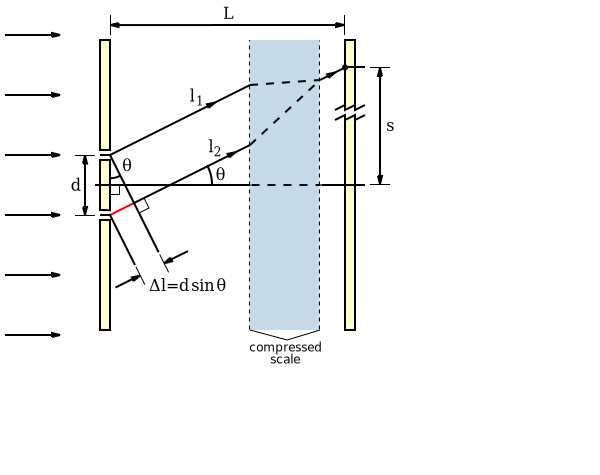

In [24]:
DSS=SVG(qfog_sys_path+"/jupyter-notebooks/Dekant-talk-at-Meetup-Dec-19-2016/Two-Slit_Experiment_Approximation.svg")
display(DSS)

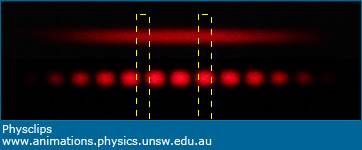

In [25]:
DS=Image(qfog_sys_path+"/jupyter-notebooks/Dekant-talk-at-Meetup-Dec-19-2016/still_interference_dots_smear_boxes.jpg")
display(DS)

Light has properties associated with a wave (e.g. interference and diffraction) and properties associated with particles (local interactions, quantised properties). For many of us, 'photon' connotes particles. So, thinking about a particular photon that gave rise to one of the clicks we heard, we may ask: which slit did it go through? And, if it went through a slit, why is there interference? How did it 'know' about the other slit?

The difference between single and double slit patterns is readily explained using the wave model for light

At a point of destructive interference (e.g. yellow rectangle at left), the electric field components from the two slits are 180° out of phase, so they cancel out, which gives zero intensity. And zero intensity means zero photons.

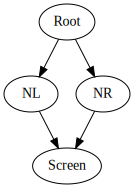

In [26]:
from graphs.BayesNet import *
path_bif = qfog_sys_path+'/examples_qbnets/YoungDoubleSlit.bif'
qbnet = BayesNet.read_bif(path_bif, True) # The flag value False indicates that this is a classical B-net
path_dot = qfog_sys_path+'/examples_qbnets/YoungDoubleSlit.dot'
qbnet.write_dot(path_dot)
file = open(path_dot, 'r')#READING DOT FILE
dot=file.read()
Source(dot)

This simple QB-Network can capture the seaming paradox of Young's double slit experiment. When we don't measure what path a photon takes than we don't condition on the nodes NL or NR (couter N for Left or Right slit).

In [27]:
pd_df_list=[None] * 2
id_nums = sorted([node.id_num for node in qbnet.nodes])
node_list = [qbnet.get_node_with_id_num(k) for k in id_nums]

# this is simpler but erratic
# node_list = list(bnet.nodes)

brute_eng = EnumerationEngine(qbnet, is_quantum=True)
brute_pot_list = brute_eng.get_unipot_list(node_list,
        print_stories=True, print_format='HTML')
df=[p.pot_arr.tolist() for p in brute_pot_list if p.focus_node.name == 'Screen']
pd_df_list[0]=pd.DataFrame(np.array(df[0]), index = ['Spot','Other'])
[print(p) for p in brute_pot_list]

Story #,Root,NL,NR,Screen,Potential
1,0,0,0,0,0j
2,1,0,0,0,0j
3,0,0,1,0,0j
4,1,0,1,0,(-0.0707106781187-0j)
5,0,1,0,0,(0.0707106781187+0j)
6,1,1,0,0,0j
7,0,1,1,0,0j
8,1,1,1,0,0j
9,0,0,0,1,0j
10,1,0,0,1,0j


['Root']
[ 0.54574639  0.45425361]
['Screen']
[ 0.  1.]
['NR']
[ 0.54574639  0.45425361]
['NL']
[ 0.45425361  0.54574639]


[None, None, None, None]

We chose a Spot in the area of destructive interference (e.g. yellow rectangle at left in above photo). When no measurement i.e. conditioning on any of the slits is performed this means we have zero probability to find a photon in this area of the screen.

Note we are now dealing with complex probability potentials, in the unconditioned case this means the total complex amplitude has to square to 1. Diviations form one give us an indication of the numerical stability of the QB-net inference.

In [28]:
0.710672061737**2+0.703526440298**2

1.0000042315318938

Now we restrict the possible Feynman paths by measuring if a photon goes through the left slit, i.e. setting the active state space of the NL node to 1 only.

In [29]:
qbnet.get_node_named("NL").active_states = [1]
id_nums = sorted([node.id_num for node in qbnet.nodes])
node_list = [qbnet.get_node_with_id_num(k) for k in id_nums]

# this is simpler but erratic
# node_list = list(bnet.nodes)

brute_eng = EnumerationEngine(qbnet, is_quantum=True)
brute_pot_list = brute_eng.get_unipot_list(node_list, print_stories=True, print_format='HTML')
df=[p.pot_arr.tolist() for p in brute_pot_list if p.focus_node.name == 'Screen']
pd_df_list[1]=pd.DataFrame(np.array(df[0]), index = ['Spot','Other'])
[print(p) for p in brute_pot_list]
print(pd_df_list[1])

['Root']
[ 1.  0.]
['Screen']
[ 0.01  0.99]
['NR']
[ 1.  0.]
['NL']
[ 0.  1.]
          0
Spot   0.01
Other  0.99


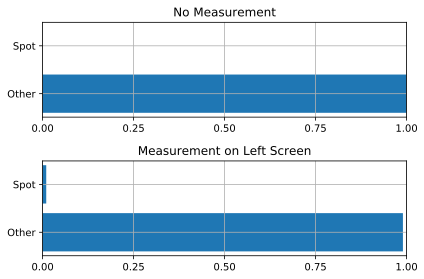

In [30]:
scenarios = ['No Measurement', 'Measurement on Left Screen']
fig, ax_list = plt.subplots(nrows=2, ncols=1)
for k, vtx in enumerate(scenarios):
    single_pd(ax_list[k], vtx, pd_df_list[k])
plt.tight_layout()
plt.show()

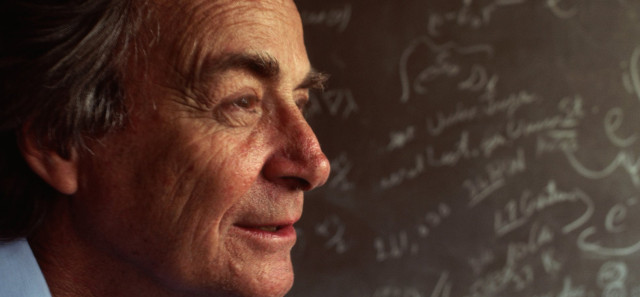

In [31]:
RF=Image(qfog_sys_path+"/jupyter-notebooks/Dekant-talk-at-Meetup-Dec-19-2016/Richard-Feynman.jpg")
display(RF)

To finish with an obligatory Feynman quote:

<blockquote><i>“In two slit interference, quantum mechanics cannot determine which slit the electron went through.”</i></blockquote>
<blockquote>
This statement reflects not the poverty of quantum mechanics, but its richness.
In classical mechanics, an electron must have a position — it must pass through one slit or the other.
In quantum mechanics an electron might have a position, but there is an infinitely rich variety of other possibilities as well.
<br>
It is no failure of our instruments that they cannot measure what does not exist.</blockquote>
 